# Data cleaning

In [63]:
import pandas as pd
pixar = pd.read_csv("PixarMovies.csv")

pixar.head(5)

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
0,1995,Toy Story,81,100,8.3,92,29.14,362.0,191.8,356.21,170.2,52.98%,47.02%,30,3,0
1,1998,A Bug's Life,96,92,7.2,77,33.26,363.4,162.8,277.18,200.6,44.80%,55.20%,45,1,0
2,1999,Toy Story 2,92,100,7.9,88,57.39,485.0,245.9,388.43,239.2,50.70%,49.32%,90,1,0
3,2001,"Monsters, Inc.",90,96,8.1,78,62.58,528.8,255.9,366.12,272.9,48.39%,51.61%,115,3,1
4,2003,Finding Nemo,104,99,8.2,90,70.25,895.6,339.7,457.46,555.9,37.93%,62.07%,94,4,1


In [2]:
pixar.dtypes

Year Released                int64
Movie                       object
Length                       int64
RT Score                     int64
IMDB Score                 float64
Metacritic Score             int64
Opening Weekend            float64
Worldwide Gross            float64
Domestic Gross             float64
Adjusted Domestic Gross    float64
International Gross        float64
Domestic %                  object
International %             object
Production Budget            int64
Oscars Nominated           float64
Oscars Won                 float64
dtype: object

#### We need to convert the `Domestic %` and `International %` columns into `float` columns.  To do that, we need to drop the `%` character from each value (by taking advantage of [vectorized string operations](http://pandas.pydata.org/pandas-docs/stable/text.html#working-with-text-data)) in those columns and use the `astype()` method to convert to `float` dtype. Try converting the column to the `float` dtypes without removing the `%` sign at the end and see what happens.

In [64]:
# Use the `str` attribute followed by the string method `rstrip()` to apply the string method to every value in the column.
pixar["Domestic %"] = pixar["Domestic %"].str.rstrip("%").astype("float")
pixar["International %"] = pixar["International %"].str.rstrip("%").astype("float")

##### We need to check if any of the columns have missing values. In the following code, we:

- Use a `for` loop to iterate through the columns
- Use the Series method [`isnull()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.isnull.html) to return a Boolean Series for the values in each column. The Boolean Series will contain `True` as the value for that row index if the value is null (or a `NaN` object).
- Use Boolean filtering to only return rows that have a `NaN` value for that column.
- If the returned DataFrame has more than 0 results, grab the index using the `index` attribute and call the `tolist()` method on the resulting Index object. Add the resulting list of indices to `bad_rows`.
- Outside the loop, use the `loc[]` method to select the rows that contain null values.

In [46]:
# Long way
bad_row_indices = []
for col in pixar.columns:
    boolean_series = pixar[col].isnull()
    null_rows = pixar[boolean_series]
    if len(null_rows) > 0:
        bad_row_indices += null_rows.index.tolist()
pixar.loc[bad_row_indices]

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
14,2015,Inside Out,102,98,8.8,93,90.4,677.1,340.5,340.5,336.6,50.29%,49.71%,175,NaN,NaN
14,2015,Inside Out,102,98,8.8,93,90.4,677.1,340.5,340.5,336.6,50.29%,49.71%,175,NaN,NaN


In [32]:
# A quick google search for "pandas show rows with missing values" 
# finds us a shortcut, courtesy of StackOverflow - http://stackoverflow.com/a/30447205
print(pixar[pixar.isnull().any(axis=1)])

# Let's break down the shortcut above, which utilizes the 
# `any()` method - http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.any.html

# Does the column contain any NaN values (axis=0), True or False
print(pixar.isnull().any(axis=0))

# Does the row contain any NaN values (axis=1), True or False
print(pixar.isnull().any(axis=1))

# Show me only the rows that contain a NaN value
pixar[pixar.isnull().any(axis=1)]

    Year Released       Movie  Length  RT Score  IMDB Score  Metacritic Score  \
14           2015  Inside Out     102        98         8.8                93   

    Opening Weekend  Worldwide Gross  Domestic Gross  Adjusted Domestic Gross  \
14             90.4            677.1           340.5                    340.5   

    International Gross Domestic % International %  Production Budget  \
14                336.6     50.29%          49.71%                175   

    Oscars Nominated  Oscars Won  
14               NaN         NaN  
Year Released              False
Movie                      False
Length                     False
RT Score                   False
IMDB Score                 False
Metacritic Score           False
Opening Weekend            False
Worldwide Gross            False
Domestic Gross             False
Adjusted Domestic Gross    False
International Gross        False
Domestic %                 False
International %            False
Production Budget          F

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
14,2015,Inside Out,102,98,8.8,93,90.4,677.1,340.5,340.5,336.6,50.29%,49.71%,175,NaN,NaN


It seems like the null values are concentrated in just one movie (Inside Out) in the `Oscars Nominated` and `Oscars Won` columns.  Since Matplotlib skips `NaN` values when plotting, we can leave these values for now.

##### Convert the `IMDB Score` column to a 100 point scale, to match the `RT Score` and `Metacritic Score` columns.

In [65]:
pixar["IMDB Score"] = pixar["IMDB Score"] * 10

# Data Visualization, Histograms

In [66]:
import matplotlib.pyplot as plt
% matplotlib inline

In [50]:
# Iterate through Series object that represents a DataFrame column's dtypes
# and only append the non-object columns to `numeric_columns`.
print(pixar.dtypes)
numeric_columns = []
for index,value in pixar.dtypes.iteritems():
    if value != "object":
        numeric_columns.append(index)
print(numeric_columns)

Year Released                int64
Movie                       object
Length                       int64
RT Score                     int64
IMDB Score                 float64
Metacritic Score             int64
Opening Weekend            float64
Worldwide Gross            float64
Domestic Gross             float64
Adjusted Domestic Gross    float64
International Gross        float64
Domestic %                  object
International %             object
Production Budget            int64
Oscars Nominated           float64
Oscars Won                 float64
dtype: object
['Year Released', 'Length', 'RT Score', 'IMDB Score', 'Metacritic Score', 'Opening Weekend', 'Worldwide Gross', 'Domestic Gross', 'Adjusted Domestic Gross', 'International Gross', 'Production Budget', 'Oscars Nominated', 'Oscars Won']


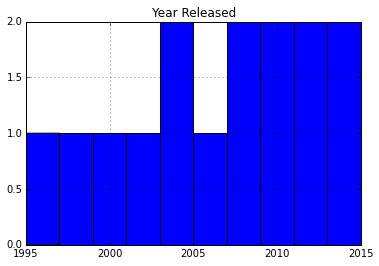

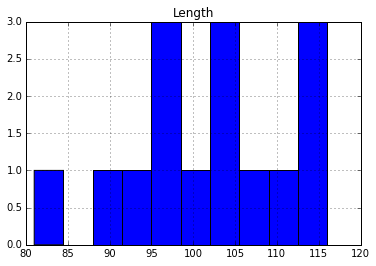

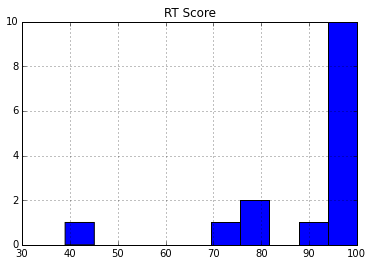

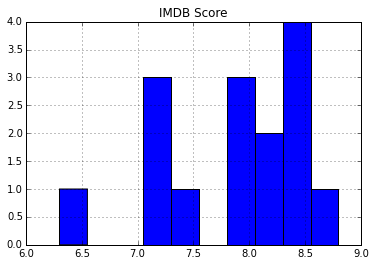

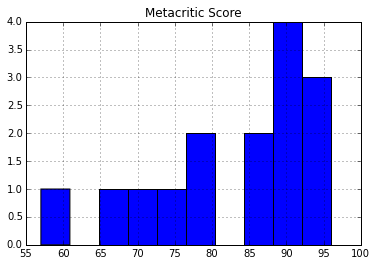

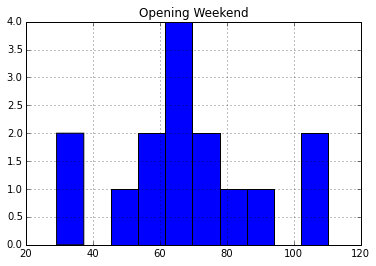

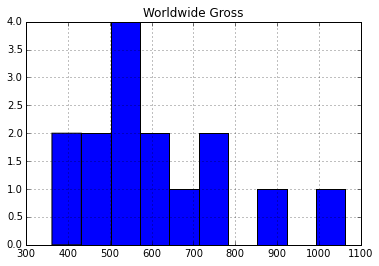

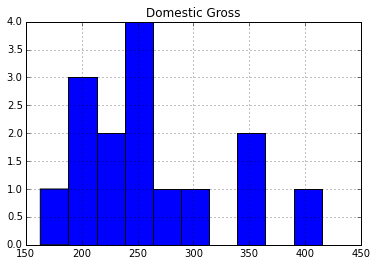

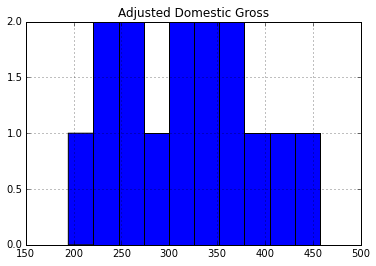

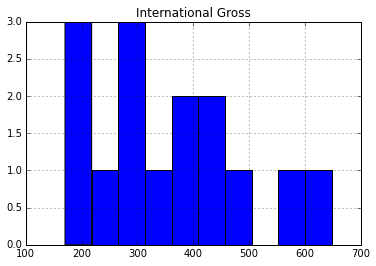

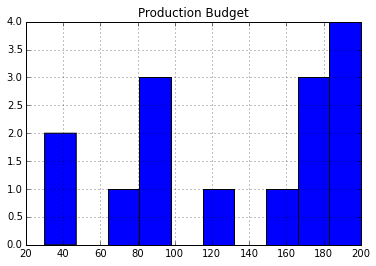

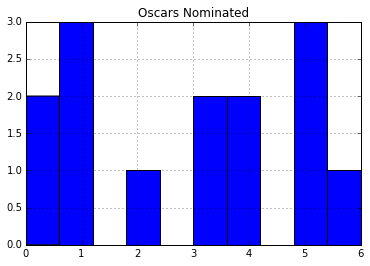

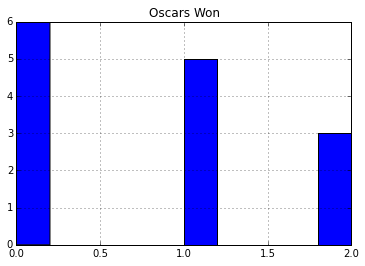

In [53]:
for num_col in numeric_columns:
    pixar[num_col].hist()
    plt.title(num_col)
    plt.show()

# Data Visualization, Scatter Plots

##### How does the length of a movie correlate to how the critics rated it?

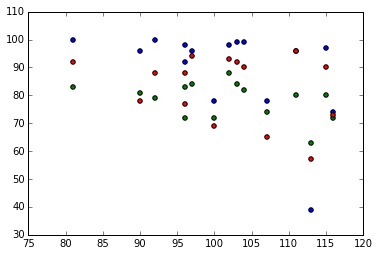

In [59]:
plt.scatter(pixar["Length"], pixar["RT Score"], c="blue")
plt.scatter(pixar["Length"], pixar["IMDB Score"], c="green")
plt.scatter(pixar["Length"], pixar["Metacritic Score"], c="red")
plt.show()

#### How does the production budget correlate to the number of oscars a movie was nominated for? 

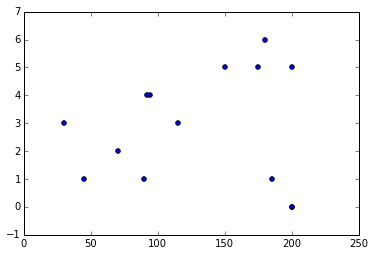

In [70]:
plt.scatter(pixar["Production Budget"], pixar["Oscars Nominated"])
plt.show()

#### How does the production budget correlate to the domestic gross revenue and the international gross revenue?

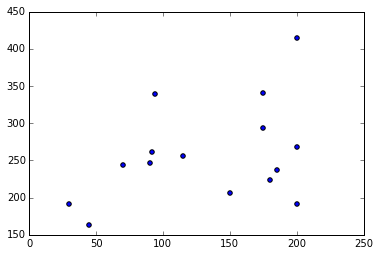

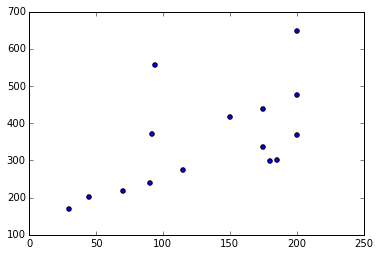

In [72]:
plt.scatter(pixar["Production Budget"], pixar["Domestic Gross"])
plt.show()
plt.scatter(pixar["Production Budget"], pixar["International Gross"])
plt.show()

# Data visualization, Stacked Bar Plot

In [62]:
pixar

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
0,1995,Toy Story,81,100,83,92,29.14,362.0,191.8,356.21,170.2,52.98%,47.02%,30,3,0
1,1998,A Bug's Life,96,92,72,77,33.26,363.4,162.8,277.18,200.6,44.80%,55.20%,45,1,0
2,1999,Toy Story 2,92,100,79,88,57.39,485.0,245.9,388.43,239.2,50.70%,49.32%,90,1,0
3,2001,"Monsters, Inc.",90,96,81,78,62.58,528.8,255.9,366.12,272.9,48.39%,51.61%,115,3,1
4,2003,Finding Nemo,104,99,82,90,70.25,895.6,339.7,457.46,555.9,37.93%,62.07%,94,4,1
5,2004,The Incredibles,115,97,80,90,70.47,631.4,261.4,341.28,370.0,41.40%,58.60%,92,4,2
6,2006,Cars,116,74,72,73,60.12,462.0,244.1,302.59,217.9,52.84%,47.16%,70,2,0
7,2007,Ratatouille,111,96,80,96,47.00,623.7,206.4,243.65,417.3,33.09%,66.91%,150,5,1
8,2008,WALL-E,97,96,84,94,63.10,521.3,223.8,253.11,297.5,42.93%,57.07%,180,6,1
9,2009,Up,96,98,83,88,68.11,731.3,293.0,318.90,438.3,40.07%,59.93%,175,5,2


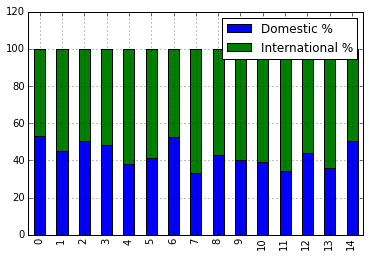

In [68]:
# Create a stacked bar plot using the Domestic % and International % columns.
pixar[["Domestic %", "International %"]].plot(kind='bar', stacked=True)
plt.show()

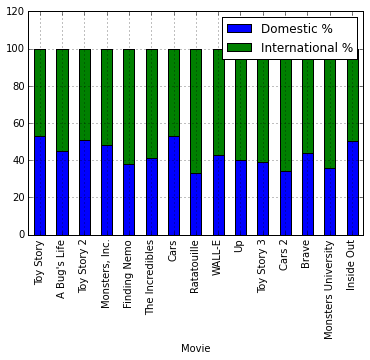

In [69]:
# Set the index to the "Movie" column before plotting so that 
# Pandas knows to use the "Movie" column values on the x-axis.
pixar.set_index("Movie", inplace=True)
pixar[["Domestic %", "International %"]].plot(kind='bar', stacked=True)